<a href="https://colab.research.google.com/github/ndegwaanth/Credit_Card_Fraud_Detection/blob/main/Credit_card_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [41]:
df = pd.read_csv('/content/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [42]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [43]:
df.shape

(156602, 31)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156602 entries, 0 to 156601
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    156602 non-null  float64
 1   V1      156602 non-null  float64
 2   V2      156602 non-null  float64
 3   V3      156602 non-null  float64
 4   V4      156602 non-null  float64
 5   V5      156602 non-null  float64
 6   V6      156602 non-null  float64
 7   V7      156602 non-null  float64
 8   V8      156602 non-null  float64
 9   V9      156600 non-null  float64
 10  V10     156600 non-null  float64
 11  V11     156600 non-null  float64
 12  V12     156600 non-null  float64
 13  V13     156600 non-null  float64
 14  V14     156600 non-null  float64
 15  V15     156600 non-null  float64
 16  V16     156600 non-null  float64
 17  V17     156600 non-null  float64
 18  V18     156600 non-null  float64
 19  V19     156600 non-null  float64
 20  V20     156600 non-null  float64
 21  V21     15

In [45]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,156602.000000,156602.000000,156602.000000,156602.000000,156602.000000,156602.000000,156602.000000,156602.000000,156602.000000,156600.000000,...,156600.000000,156600.000000,156600.000000,156600.000000,156600.000000,156600.000000,156600.000000,156600.000000,156600.000000,156600.000000
mean,55546.755093,-0.231698,0.044013,0.600725,0.136680,-0.235349,0.070368,-0.104383,0.049637,-0.022135,...,-0.037252,-0.108773,-0.027278,0.011393,0.112927,0.023703,0.001281,0.002965,88.599329,0.002165
std,22716.148104,1.843318,1.622897,1.331440,1.353676,1.329121,1.290294,1.208446,1.242963,1.138444,...,0.745365,0.648418,0.585895,0.595794,0.450968,0.491176,0.393315,0.311944,245.968499,0.046477
min,0.000000,-56.407510,-72.715728,-33.680984,-5.519697,-42.147898,-26.160506,-41.506796,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-11.710896,0.000000,0.000000
25%,39715.000000,-1.020695,-0.539904,0.091803,-0.720971,-0.872300,-0.675282,-0.599497,-0.144312,-0.682601,...,-0.229077,-0.551440,-0.170419,-0.327907,-0.162657,-0.325329,-0.062985,-0.010255,5.920000,0.000000
50%,57466.500000,-0.255114,0.118471,0.701902,0.156548,-0.278135,-0.186773,-0.051314,0.072600,-0.112705,...,-0.059829,-0.083853,-0.041191,0.064981,0.152958,-0.053933,0.010697,0.022829,22.500000,0.000000
75%,73885.000000,1.166125,0.804716,1.335461,0.973874,0.296951,0.459720,0.435298,0.367603,0.580494,...,0.115063,0.321873,0.090123,0.411628,0.411646,0.290399,0.089725,0.078260,78.910000,0.000000
max,102233.000000,2.401777,21.467203,9.382558,16.875344,34.801666,22.529298,36.677268,20.007208,15.594995,...,27.202839,10.503090,19.002942,4.022866,7.519589,3.517346,12.152401,33.847808,19656.530000,1.000000


In [46]:
df.drop(['Time'], axis=1, inplace=True)

In [47]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [48]:
scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1,1)) # Reshape the 'Amount' column into a 2D array

In [49]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.248084,0.0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.349271,0.0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.179263,0.0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.141891,0.0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.075658,0.0


In [50]:
df.duplicated().sum()

6731

In [51]:
df = df.drop_duplicates()

In [52]:
df.duplicated().sum()

0

In [53]:
df.shape

(149871, 30)

In [54]:
df['Class'].value_counts()

,count
Class,
0.0,149549
1.0,320


In [63]:
df.isna().sum()
df.fillna(df.mean(), inplace=True)

In [64]:
df['Class'].fillna(df['Class'].mode()[0], inplace=True)

In [65]:
df.isna().any()

,0
V1,False
V2,False
V3,False
V4,False
V5,False
V6,False
V7,False
V8,False
V9,False
V10,False


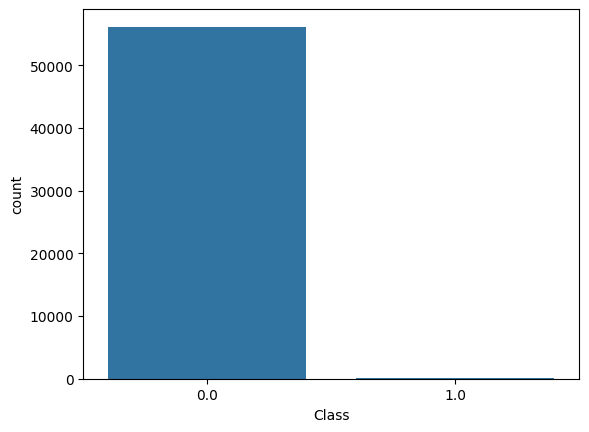

In [34]:
sns.countplot(x='Class', data=df)
plt.show()

In [20]:
# for col in df.columns:
#   plt.figure(figsize=(12, 4))
#   sns.countplot(data=df, x=col)
#   plt.title(f'credit fraud countplot for {col}')
#   plt.show()

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix

In [67]:
X = df.drop('Class', axis=1)
y = df['Class']

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


=========== Logistics Regression==============
Accuracy Score: 0.9548987813644038

 Precision Score: 0.9773345421577516

 Recall Score: 0.9319058385423593

 F1 Score: 0.9540797222316778


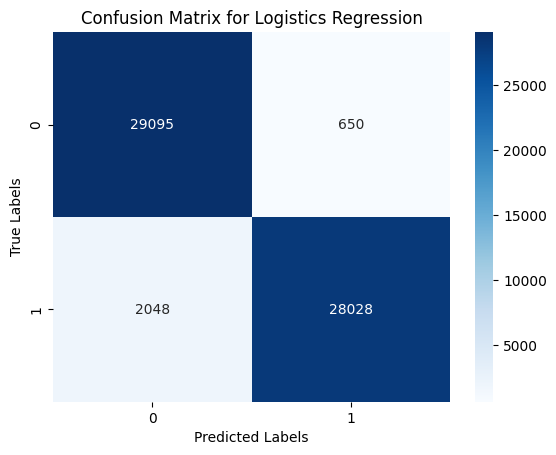


=========== Decision Tress Classifier==============
Accuracy Score: 0.9979438658665017

 Precision Score: 0.9971122249145284

 Recall Score: 0.9988030323181274

 F1 Score: 0.9979569124462236


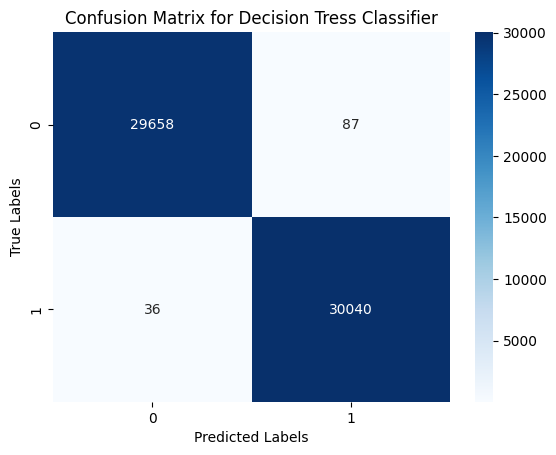


=========== Random Forest Classifier==============
Accuracy Score: 0.9998328346232929

 Precision Score: 0.9996676194907931

 Recall Score: 1.0

 F1 Score: 0.999833782121605


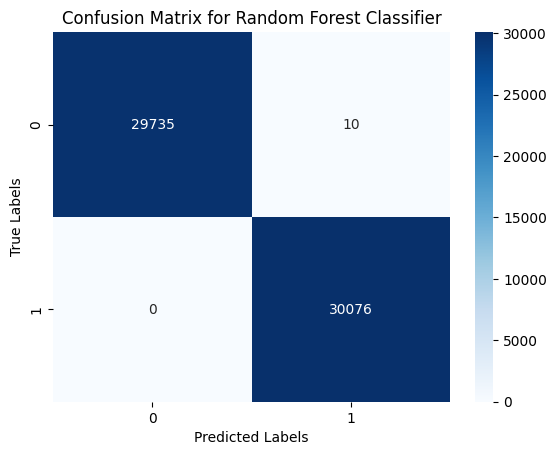

In [100]:
model = {
    'Logistics Regression': LogisticRegression(),
    'Decision Tress Classifier': DecisionTreeClassifier(),
    'Random Forest Classifier': RandomForestClassifier()
}

for model_name, model in model.items():
  print(f"\n=========== {model_name}==============")
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
  print(f"\n Precision Score: {precision_score(y_test, y_pred)}")
  print(f"\n Recall Score: {recall_score(y_test, y_pred)}")
  print(f"\n F1 Score: {f1_score(y_test, y_pred)}")

  cnf = confusion_matrix(y_test, y_pred)
  sns.heatmap(cnf, annot=True, fmt='d', cmap='Blues')
  plt.title(f'Confusion Matrix for {model_name}')
  plt.xlabel('Predicted Labels')
  plt.ylabel('True Labels')
  plt.show()

  with open(f"{model_name.replace(' ', '_')}_model.pkl", "wb") as file:
    pickle.dump(model, file)

### UNDERSAMPLING

In [90]:
norma_df = df[df['Class']==0]
fraud_df = df[df['Class']==1]

In [89]:
norma_df.shape

(149551, 30)

In [91]:
fraud_df.shape

(320, 30)

In [92]:
normal_sample = norma_df.sample(n=473)

In [93]:
normal_sample.shape

(473, 30)

In [94]:
new_df = pd.concat([normal_sample, fraud_df], ignore_index=True)
new_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1.225135,-0.086842,-0.346410,0.965707,0.354924,0.626827,-0.090188,0.211212,0.456717,0.135868,...,-0.195839,-0.559101,-0.320668,-1.432280,0.856580,-0.249309,-0.001823,-0.007190,-0.199576,0.0
1,-2.942474,-1.426037,1.937862,0.681275,0.850337,-0.878428,-0.992803,0.784459,0.332581,-0.931523,...,0.161063,0.260791,0.534227,0.050831,0.192255,-0.522652,-0.060689,-0.029504,-0.356142,0.0
2,1.277993,-0.911814,0.872913,-0.579615,-1.349875,-0.150698,-1.029226,-0.016017,-0.180942,0.458141,...,0.317796,0.893972,-0.232189,-0.064266,0.531798,-0.022516,0.042605,0.032459,-0.071551,0.0
3,2.145586,-1.658234,0.017367,-1.655656,-1.696322,0.315081,-1.872141,0.173153,-1.071556,1.611014,...,-0.018280,0.417761,0.341198,0.706291,-0.559382,-0.286814,0.063617,-0.025642,-0.206122,0.0
4,-2.261469,-2.210113,2.528659,-0.971331,0.335637,-1.499801,-0.771005,0.288423,1.930363,-2.000536,...,0.266929,0.330671,0.433350,0.714919,0.418950,-0.789581,0.053295,0.163809,0.269794,0.0


In [95]:
new_df['Class'].value_counts()

,count
Class,
0.0,473
1.0,320


In [96]:
X_df = new_df.drop('Class', axis=1)
y_df = new_df['Class']

In [97]:
X_test_1, X_train_1, y_test_1, y_train_1 = train_test_split(X_df, y_df, test_size=0.2, random_state=42)


=========== Logistics Regression==============
Accuracy Score: 0.9321766561514195

 Precision Score: 0.9475982532751092

 Recall Score: 0.875

 F1 Score: 0.909853249475891


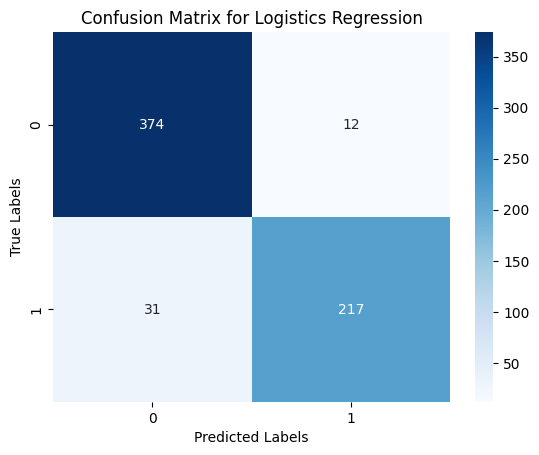


=========== Decision Tress Classifier==============
Accuracy Score: 0.9069400630914827

 Precision Score: 0.8566037735849057

 Recall Score: 0.9153225806451613

 F1 Score: 0.884990253411306


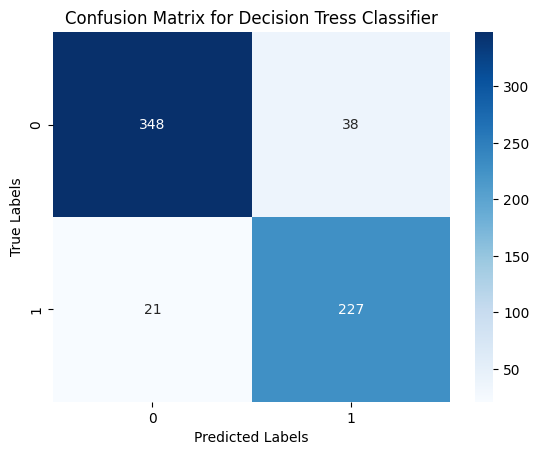


=========== Random Forest Classifier==============
Accuracy Score: 0.9526813880126183

 Precision Score: 0.9866071428571429

 Recall Score: 0.8911290322580645

 F1 Score: 0.9364406779661016


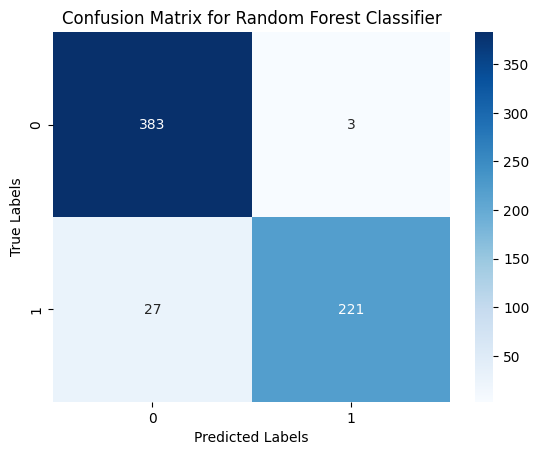

In [79]:
model = {
    'Logistics Regression': LogisticRegression(),
    'Decision Tress Classifier': DecisionTreeClassifier(),
    'Random Forest Classifier': RandomForestClassifier()
}

for model_name, model in model.items():
  print(f"\n=========== {model_name}==============")
  model.fit(X_train_1, y_train_1)
  y_pred_1 = model.predict(X_test_1)
  print(f"Accuracy Score: {accuracy_score(y_test_1, y_pred_1)}")
  print(f"\n Precision Score: {precision_score(y_test_1, y_pred_1)}")
  print(f"\n Recall Score: {recall_score(y_test_1, y_pred_1)}")
  print(f"\n F1 Score: {f1_score(y_test_1, y_pred_1)}")

  cnf = confusion_matrix(y_test_1, y_pred_1)
  sns.heatmap(cnf, annot=True, fmt='d', cmap='Blues')
  plt.title(f'Confusion Matrix for {model_name}')
  plt.xlabel('Predicted Labels')
  plt.ylabel('True Labels')
  plt.show()

  with open(f"{model_name.replace(' ', '_')}_model.pkl", "wb") as file:
    pickle.dump(model, file)

### OVERSAMPLING

In [98]:
from imblearn.over_sampling import SMOTE


In [99]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [82]:
X_resampled.shape

(299102, 29)

In [83]:
y_resampled.shape

(299102,)

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


=========== Logistics Regression==============
Accuracy Score: 0.9548987813644038

 Precision Score: 0.9773345421577516

 Recall Score: 0.9319058385423593

 F1 Score: 0.9540797222316778


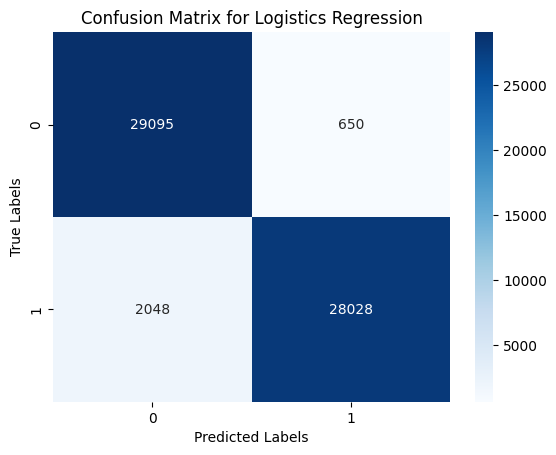


=========== Decision Tress Classifier==============
Accuracy Score: 0.9979104327911603

 Precision Score: 0.9971450386747668

 Recall Score: 0.9987032850113047

 F1 Score: 0.9979235535474011


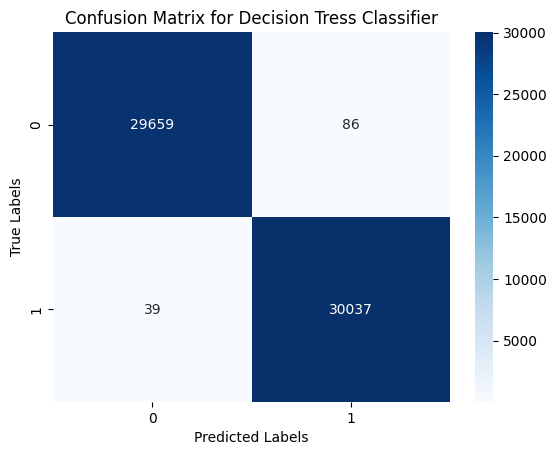


=========== Random Forest Classifier==============
Accuracy Score: 0.9998495511609635

 Precision Score: 0.999700847598471

 Recall Score: 1.0

 F1 Score: 0.9998504014228486


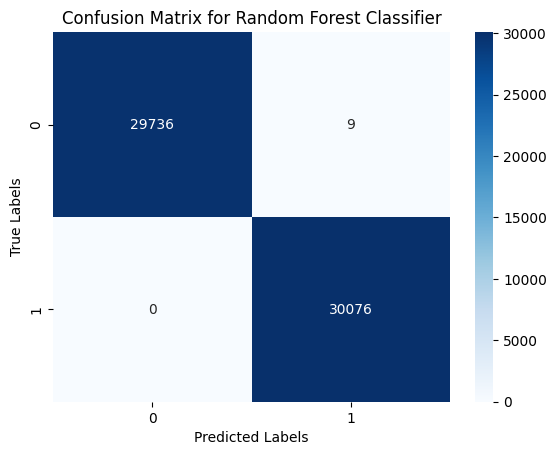

In [101]:
model = {
    'Logistics Regression': LogisticRegression(),
    'Decision Tress Classifier': DecisionTreeClassifier(),
    'Random Forest Classifier': RandomForestClassifier()
}

for model_name, model in model.items():
  print(f"\n=========== {model_name}==============")
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
  print(f"\n Precision Score: {precision_score(y_test, y_pred)}")
  print(f"\n Recall Score: {recall_score(y_test, y_pred)}")
  print(f"\n F1 Score: {f1_score(y_test, y_pred)}")

  cnf = confusion_matrix(y_test, y_pred)
  sns.heatmap(cnf, annot=True, fmt='d', cmap='Blues')
  plt.title(f'Confusion Matrix for {model_name}')
  plt.xlabel('Predicted Labels')
  plt.ylabel('True Labels')
  plt.show()

  with open(f"{model_name.replace(' ', '_')}_model_under_oversampling.pkl", "wb") as file:
    pickle.dump(model, file)

In [86]:
y_resampled.value_counts()

,count
Class,
0.0,149551
1.0,149551


In [107]:
import pickle
import os

if os.path.exists("Logistic_credic_model.pkl") and os.path.getsize("Logistic_credic_model.pkl") > 0:
    with open("Logistic_credic_model.pkl", "rb") as file:
        logistic_model = pickle.load(file)
else:
    print("Error: The file 'Logistic_credic_model.pkl' is either missing or empty. Please ensure the model was saved correctly.")

if os.path.exists("Decision_Tress_Classifier_model.pkl") and os.path.getsize("Decision_Tress_Classifier_model.pkl") > 0:
    with open("Decision_Tress_Classifier_model.pkl", "rb") as file:
        decision_model = pickle.load(file)
else:
    print("Error: The file 'Decision_Tress_Classifier_model.pkl' is either missing or empty. Please ensure the model was saved correctly.")

if os.path.exists("Random_Forest_Classifier.pkl") and os.path.getsize("Random_Forest_Classifier.pkl") > 0:
    with open("Random_Forest_Classifier.pkl", "rb") as file:
        random_model = pickle.load(file)
else:
    print("Error: The file 'Random_Forest_Classifier.pkl' is either missing or empty. Please ensure the model was saved correctly.")

Error: The file 'Logistic_credic_model.pkl' is either missing or empty. Please ensure the model was saved correctly.
Error: The file 'Random_Forest_Classifier.pkl' is either missing or empty. Please ensure the model was saved correctly.


In [ ]:
def model_prediction_with_logistic(input_data):
